# Causal inference - Generalities

- toc: true
- badges: false
- author: Thomas Laurent
- categories: [causal inference]

## Background

### Usefulness of causal inference

There are several contexts where causal inference can help answer particular research questions. For instance, one may be interested in analyzing the effect of an intervention, i.e a **"treatment effect"**. This effect can be measured at different levels, such as among treated group, subgroups or individuals.

The measurement of a treatment effect relies on evaluating the difference between two potential outcomes: 1) the outcome when the individual is exposed to the treatment and 2) the outcome when the individual is exposed to the control. In observational research, both cannot be observed for each individual. Hence, use of **counterfactuals**, defined as a what would have happened without an intervention for those treated and what would have happened with an intervention for their counterpart.

Causal inference may help to answer different research questions including:
- What is the average treatment of the treatment among the entire population ?
- What is the average treatment of the treatment among the treated / untreated groups ?
- Why was a treatment effective ?

Importantly, prediction models are not useful when focusing on the decision-making process for instance for health policy. This is because that these models cannot help when reasoning of making a change to a system or taking an action. Prediction models aim at reducing the difference between the actual value and the predicted value and not optimizing the outcome when taking an action such as administrating a treatment. 

Causal inference framework is applicable to randomized controlled trial (RCTs) and also real-world data. Real-world data present the advantage of being helpful to address a broader range of research questions and are less expensive in comparison with RCTs.

## Causal inference fondamentals

### Counterfactual outcomes

Each individual/patient receives either the treatment or not, meaning that among the two potential outcomes as mentioned above, only one is observed in the data. The other potential outcome that is not observed for this particular individual/patient is refered as the **counterfactual**. It is the outcome in a virtual setting where the individual would have received a different treatment that what has been observed. Assessing causality means comparing the actual outcome with the counterfactual. To be able to do that, there are several assumptions that are required to be met.

### Confounder relating issues

Suppose that there are differences between the treated and control groups on other characteristics than treatment, it is not possible to conclude that a potential observed difference can be solely attributed to the treatment.  This is known as the **confounding effect**. A variable that can influence the choice of the treatment and the outcome is called a confounder that can cause spurious associations. 

Potential confounders are identified by comparing the characteristics of the treated/control groups. In real-world research, presence of confounders is a serious issue when considering causal modeling and controlling confounding effect by finding potential confounders and handling them analytically. For instance, in many cases, age is a confounder since treatment selection may be oriented by patient age, and age may influence outcome occurrence, e.g death.

### Instrumental variables

Accounting for all potential confounders may not be possible in practice. **Instrumental variables (IV)** can help adressing this situation. In RWD, the treatment is not randomly assigned but the IV is randomized. IV is correlated with the outcome and the treatment but it is assumed that the variable has no direct effect on the outcome. Also, the instrument should be considered to have a causal effect on the treatment variable. Since the instrument is considered to be randomly assigned, it is not correlated with potential confounders. Hence, the effect of the instrument is mediated by the treatment and allowing to measure the causal effect of the treatment on the outcome. An example of potential instrument is the provider preference is associated with the treatment choice.

In [8]:
#hide
! 4apt install graphviz

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



In [15]:
#hide
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

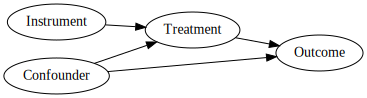

In [16]:
#hide
gv('''Confounder->Treatment
Confounder->Outcome
Instrument->Treatment->Outcome''')

## Causal inference assumptions

There are four assumptions that are required to estimate causal effects.

### 1) Stable unit treatment value assumption

Treatment assignement for a patient ***i*** should not depend on the assignment of other patients (Non interference). In addition, the treatment should be unique, that is there should not be multiple versions of the treatment

### 2) Consistency

If we denote the outcome as $Y$ and $a$ the treatment, if the treatment is set to the treatment $a$ ($T=a$) then the outcome should be that observed when the actual treatment is $a$. This must be valid for all $a$.

### 3) Ignorability

This is also named no unmeasured confounder assumption (NUCA). When conditioning on confounders, the treatment assignment is independent from the outcomes:

$$(Y_0, Y_1) \perp\!\!\!\perp T |X $$

For instance, BMI may be associated with antidepressant (as T) and individuals with higher BMI are more likely to develop diabetes. Hence, $Y_0$ and $Y_1$ are not independent.

### 4) Positivity

This assumption consists in considering that all individuals 
can get either treatment conditional on all levels of covariates X:

$$P(T=a | X=x)>0$$ for all a and x


## Types of treatment effects

As mentioned above, several effects can be estimated using causal inference framework, and also at different levels.

### Average Treatment Effect (ATE)

**Average Treatment Effect (ATE)** is an effect measured at the entire population level and is defined as:

$$ATE=E[Y(T=1)-Y(T=0)]$$

T as the treatment and Y as the binary outcome

### Average treatment effect on the treated (ATT)

This effect is measured on the treated group and is defined as:
$$ATT=E[Y(T=1)|T=1] - E[Y(T=0 |T=1)]$$

Here, $𝑌(𝑇=1)|𝑇=1$ and $𝑌(𝑇=0)|𝑇=1$ are the potential outcomes in the treated group. This can be of interest to use this estimand when there is an interest in knowing the efficacy of a treatment on those who were actually treated.

### Average treatment effect on the untreated (ATU)

This effect is measured on the untreated group and is defined as:
$$ATT=E[Y(T=1)|T=0] - E[Y(T=0 |T=0)]$$

In that case, $𝑌(𝑇=1)|𝑇=0$ and $𝑌(𝑇=0)|𝑇=0$ are the potential outcomes among the unttreated. This estimand can be suitable when the focus is to determine the effect of a treatment on those who have not been treated yet. This can be of interest when applying a healthcare policy for instance.

### Individual treatment effect (ITE)

At the individual effect, the treatment effect is refered as individual treatment effect (ITE):

$$ITE=Y_{i}(T=1)-Y_{i}(T=0)$$

Here, $Y_i(T=1)$ and $Y_i(T=0)$ are the potential treated and control outcomes of individual i, respectively. 

## Implementation in R

Here are some useful packages:
- **Dagitty**: a package for structural causal models (https://cran.r-project.org/web/packages/dagitty/index.html)
- **RISCA**: Causal Inference and Prediction in Cohort-Based Analyses that includes Inverse Probability Weighting and G-computation for marginal estimation of an exposure effect when confounders are expected (https://cran.r-project.org/web/packages/RISCA/index.html)
- **WeightIt**: Generates balancing weights for causal effect estimation using a broad range of methods (https://cran.r-project.org/web/packages/WeightIt/index.html)

## Conclusion

I described here the general context of causal inference framework, including fundamentals and provided different solutions to start implementing this framework in R.